# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import HouseholdSpecializationModelClass

# Question 1

**Explain how you solve the model**

In [2]:
model=HouseholdSpecializationModelClass()

c:\Users\emil0\Downloads\projects-2023-best-team\inauguralproject\inauguralproject.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1 - par.alpha) * HM**((par.sigma - 1) / par.sigma) + par.alpha * HF**((par.sigma - 1) / par.sigma))**(par.sigma / (par.sigma - 1))


[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


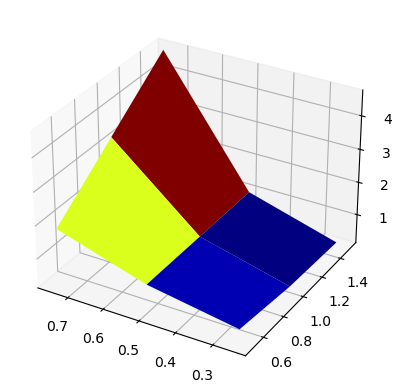

In [3]:
# First we create a 3x3 array filled with 0, to build on top of.
HFHM=np.zeros([3,3])
# We Define the values of alpha and sigma.
alpha_list = [0.25,0.5,0.75]
sigma_list = [0.5,1,1.5]
#In this loop we iterate over the values of alpha and sigma. We set alpha's and sigma's equal to the values in discrete model solution from householdspecialization. Finally we define the HF/HM.
for it, alpha in enumerate(alpha_list):
    for jt, sigma in enumerate(sigma_list):
        model.par.alpha=alpha
        model.par.sigma=sigma
        opt=model.solve_discrete()
        HFHM[it,jt]=opt.HF/opt.HM
# We create a meshgrid, where aplha and sigma repressent the x and y values respictively in the following plots.
print(HFHM)
alpha_list,sigma_list = np.meshgrid(alpha_list,sigma_list,indexing='ij')


# Standard code to create 3d plot.
import matplotlib.pyplot as plt
from matplotlib import cm # for colormaps
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

ax.plot_surface(alpha_list,sigma_list,HFHM,cmap=cm.jet)
ax.invert_xaxis()

# Question 2

Explain your code and procedure

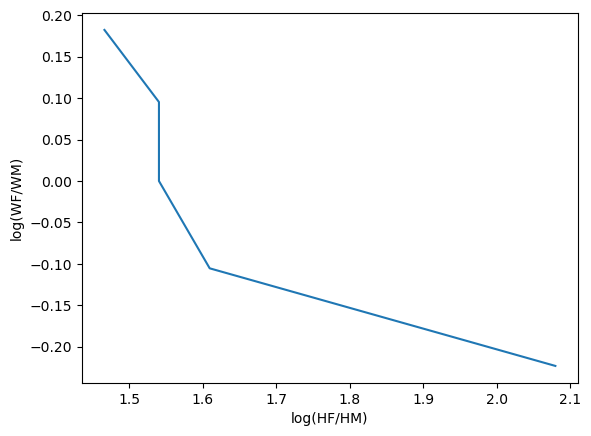

In [4]:
import numpy as np
#We define the 5 values that WF can take: 
WF_list = [0.8, 0.9, 1, 1.1, 1.2]
# Log transformation. WM is normalized to 1.
logWF = np.log(WF_list)
# We create another array filled with 0, which will be filled in in the next loop.
logHFHM = np.zeros(len(WF_list))
# Basically the same operation as in the q1 loop.
for it, alpha in enumerate(WF_list):
    model.par.wF = alpha
    opt = model.solve_discrete()
    logHFHM[it] = np.log(opt.HF / opt.HM)

plt.plot(logHFHM, logWF)
plt.ylabel('log(WF/WM)')
plt.xlabel('log(HF/HM)')
plt.show()

# Question 3

Explain your code and procedure

In [5]:
#We reset the model parameters from the previous questions.
model.par.alpha = 0.5
model.par.sigma = 1

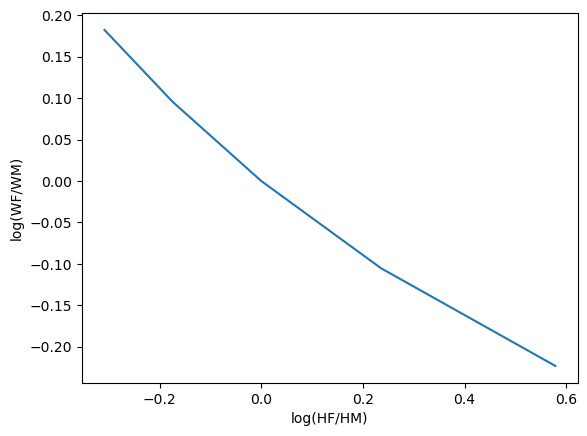

In [6]:
#we import the mathplot to allow for continous variables
import matplotlib.pyplot as plt
from matplotlib import cm # for colormaps
model.solve_wF_vec()
WF_list = [0.8, 0.9, 1, 1.1, 1.2]
logWF = np.log(WF_list)
logHFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)
plt.plot(logHFHM, logWF)
plt.ylabel('log(WF/WM)')
plt.xlabel('log(HF/HM)')
plt.show()

We find a similar relationship between wagegap and housework as in question 3, but we see a more a clear correlation, without the "kink" witnessed in the graph for Q3.

# Question 4

In [7]:
# %debug
alpha_est, sigma_est = model.estimate()
#provide estimates for alpha and sigma, utilising estimate. 
print('alpha = ', alpha_est, 'sigma = ', sigma_est)

c:\Users\emil0\Downloads\projects-2023-best-team\inauguralproject\inauguralproject.py:61: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1 - par.alpha) * HM**((par.sigma - 1) / par.sigma) + par.alpha * HF**((par.sigma - 1) / par.sigma))**(par.sigma / (par.sigma - 1))
c:\Users\emil0\Downloads\projects-2023-best-team\inauguralproject\inauguralproject.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1 - par.alpha) * HM**((par.sigma - 1) / par.sigma) + par.alpha * HF**((par.sigma - 1) / par.sigma))**(par.sigma / (par.sigma - 1))


alpha =  0.679562297525779 sigma =  0.49617904796945483


In [8]:
model.sol

namespace(LM_vec=array([6.36478148, 5.80181662, 5.24667368, 4.70916878, 4.19069066]),
          HM_vec=array([2.18818103, 2.97356576, 3.61283153, 4.13033181, 4.54337284]),
          LF_vec=array([3.53172717, 3.5691402 , 3.61264823, 3.66185761, 3.71845408]),
          HF_vec=array([5.72933282, 5.46195902, 5.24608481, 5.07121745, 4.93517361]),
          beta0=0.4243574612555376,
          beta1=-2.1567412122640235)

In [9]:
idx = 4
model.calc_utility(model.sol.LM_vec[idx], 
                   model.sol.HM_vec[idx],
                   model.sol.LF_vec[idx],
                   model.sol.HF_vec[idx])

-0.23071291102277902

In [10]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import seaborn as sns
import matplotlib.pyplot as plt

#Set up data
w_F = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
w_M = np.ones(5)
data = pd.DataFrame({'w_F': w_F, 'w_M': w_M, 'logHFHM': logHFHM})


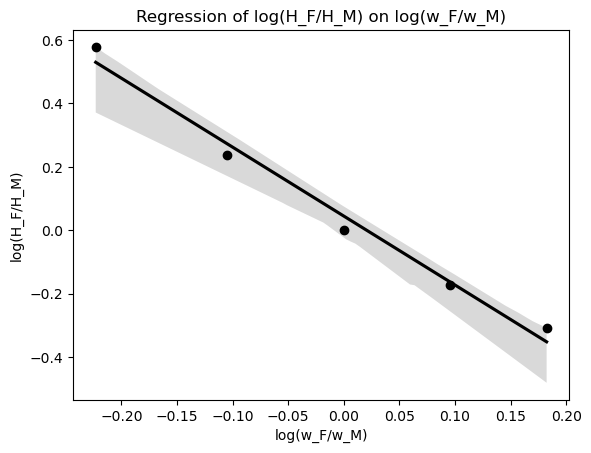

In [11]:
plt.scatter(x=np.log(w_F/w_M), y=logHFHM, color='black')
sns.regplot(x=np.log(w_F/w_M), y=logHFHM, scatter=False, color='black')

#could not get the following to work
#for i in range(5):
#    sns.regplot(x=np.log(w_F[i]/w_M[i]), y=data.loc[data['w_F']==w_F[i], 'logHFHM'], scatter=False, color='blue')

plt.xlabel('log(w_F/w_M)')
plt.ylabel('log(H_F/H_M)')
plt.title('Regression of log(H_F/H_M) on log(w_F/w_M)')
plt.show()    

The data points and fitted model for the ideal alpha and sigma values are displayed in the ensuing figure. A higher wage ratio results in a smaller time ratio, which indicates greater specialization in the labor market. This relationship between the wage ratio of men and women (w F/w M) and the time ratio of women to men (H F/H M) is captured by the model, according to an economic interpretation. The best fit of the model to the data is represented by the ideal alpha and sigma values, which can be used to calculate the predicted time ratio for a particular wage ratio.

# Alternative q4:

In [12]:
import numpy as np

# Define the parameters to search over
alphas = np.linspace(0.001, 0.1, 100)
sigmas = np.linspace(0.001, 0.1, 100)

# Initialize variables to store the best parameters and minimum error
best_alpha = None
best_sigma = None
min_error = np.inf
beta0 = 0.4
beta1 = -0.1

# Loop over all combinations of alpha and sigma
for alpha in alphas:
    for sigma in sigmas:
        # Compute the estimated betas for the given alpha and sigma
        beta0_hat = np.log(alpha)
        beta1_hat = -np.log(sigma)

        # Compute the error between the estimated betas and the true betas
        error = (beta0 - beta0_hat)**2 + (beta1 - beta1_hat)**2

        # Update the best parameters and minimum error if necessary
        if error < min_error:
            best_alpha = alpha
            best_sigma = sigma
            min_error = error

# Print the best parameters and minimum error
print("Best alpha: ", best_alpha)
print("Best sigma: ", best_sigma)
print("Minimum error: ", min_error)


Best alpha:  0.1
Best sigma:  0.1
Minimum error:  13.07638131395084


1.4903381986694755 -0.09798735871757244


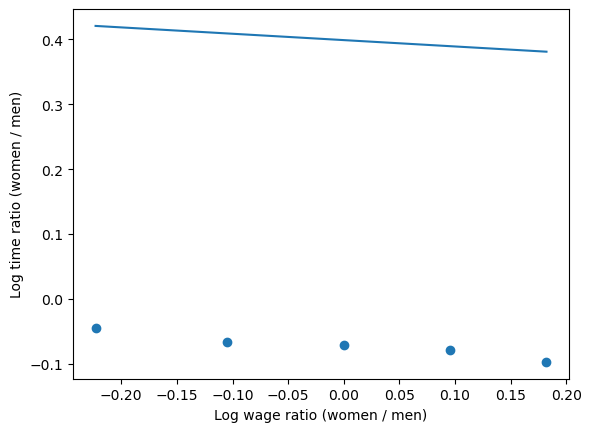

Optimal values: alpha = 1.4903381986694755 sigma = -0.09798735871757244


In [13]:
import numpy as np
from scipy.optimize import minimize

# Set up data
w_m = 1
w_f = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
log_hf_hm = np.array([-0.0456, -0.0664, -0.0716, -0.0794, -0.0972])
log_wf_wm = np.log(w_f / w_m)

# Define function to minimize
def obj_func(params):
    alpha, sigma = params
    b0_hat = np.log(alpha) + sigma * np.log(w_f / w_m)
    b1_hat = sigma
    return np.sum((0.4 - b0_hat)**2 + (-0.1 - b1_hat)**2)

# Minimize objective function
res = minimize(obj_func, [1, 1])
alpha_opt, sigma_opt = res.x

print(alpha_opt, sigma_opt)

# Plot data and fitted model
import matplotlib.pyplot as plt

plt.scatter(log_wf_wm, log_hf_hm)
plt.plot(log_wf_wm, np.log(alpha_opt) + sigma_opt * log_wf_wm)
plt.xlabel('Log wage ratio (women / men)')
plt.ylabel('Log time ratio (women / men)')
plt.show()

print("Optimal values: alpha =", alpha_opt, "sigma =", sigma_opt)

# Question 5

In [14]:
# We repeat the analyis from question 4 but setting alpha as a fixed variable.

import numpy as np
from scipy.optimize import minimize

# Set up data
w_m = 1
w_f = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
log_hf_hm = np.array([-0.0456, -0.0664, -0.0716, -0.0794, -0.0972])
log_wf_wm = np.log(w_f / w_m)

# Define function to minimize
def obj_func(params):
    sigma = params
    b0_hat = np.log(0.5) + sigma * np.log(w_f / w_m)
    b1_hat = sigma
    return np.sum((0.4 - b0_hat)**2 + (-0.1 - b1_hat)**2)

# Minimize objective function
res = minimize(obj_func, [1, 1])
alpha_opt, sigma_opt = res.x

print(alpha_opt, sigma_opt)

# Plot data and fitted model
import matplotlib.pyplot as plt

plt.scatter(log_wf_wm, log_hf_hm)
plt.plot(log_wf_wm, np.log(alpha_opt) + sigma_opt * log_wf_wm)
plt.xlabel('Log wage ratio (women / men)')
plt.ylabel('Log time ratio (women / men)')
plt.show()

print("Optimal values: alpha =", alpha_opt, "sigma =", sigma_opt)

ValueError: operands could not be broadcast together with shapes (2,) (5,) 